# Online food order prediction by using python

In [3]:
#libraries
import numpy as np
import warnings # to suppress warning
import random
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

# pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV


# Here we are importing the dataset

In [4]:
data = pd.read_csv("onlinedeliverydata.csv")
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


In [5]:
data = data[["Age","Gender", "Marital Status","Occupation", "Monthly Income", "Educational Qualifications",
             "Family size","latitude", "longitude", "Pin code","Output"]].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 33.5+ KB


# we are cheaking the dataset having empty values or not.

In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
dtype: int64

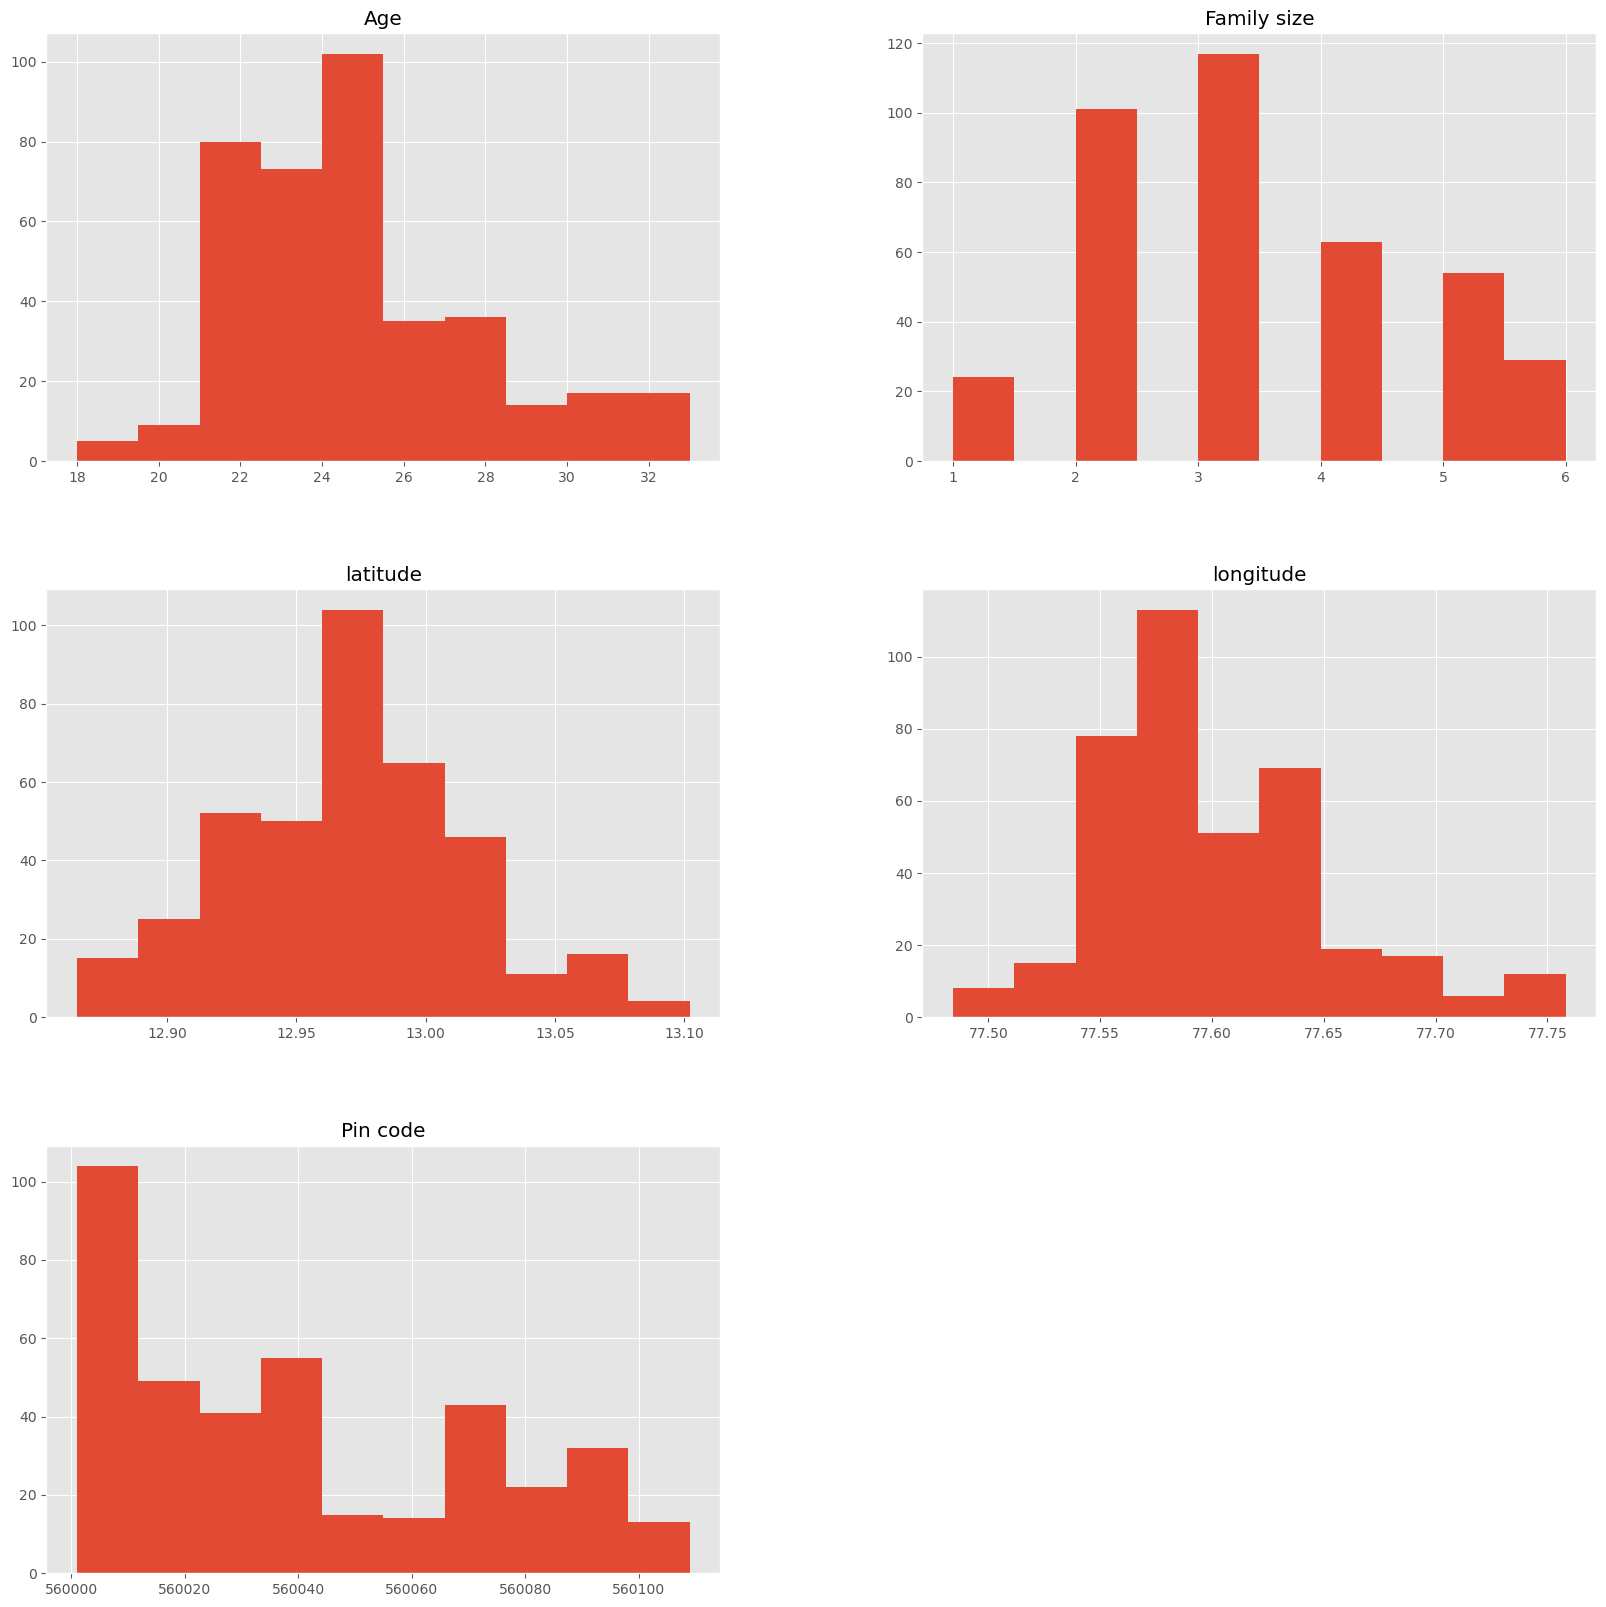

In [7]:
plt.style.use('ggplot')
plot = data.hist(figsize = (20,20))


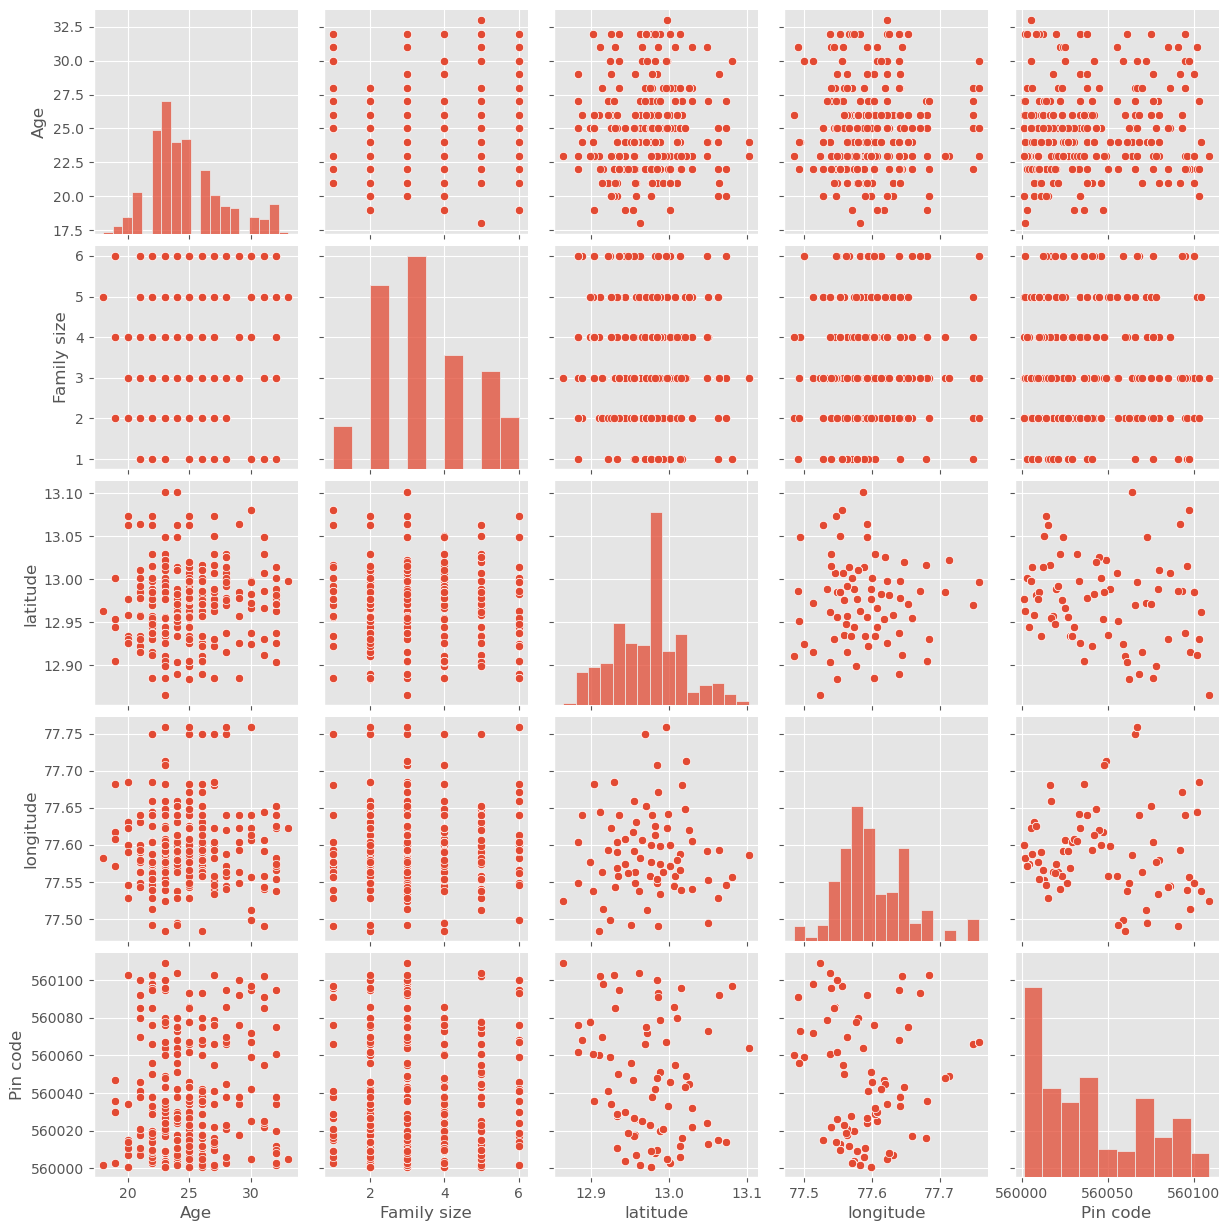

In [8]:
sns.pairplot(data )
#Pair plot for clean data

# Here we are analysis with visualization

<Axes: title={'center': 'Online Food Order Decisions Based on the Age of the Customer'}, xlabel='Age', ylabel='count'>

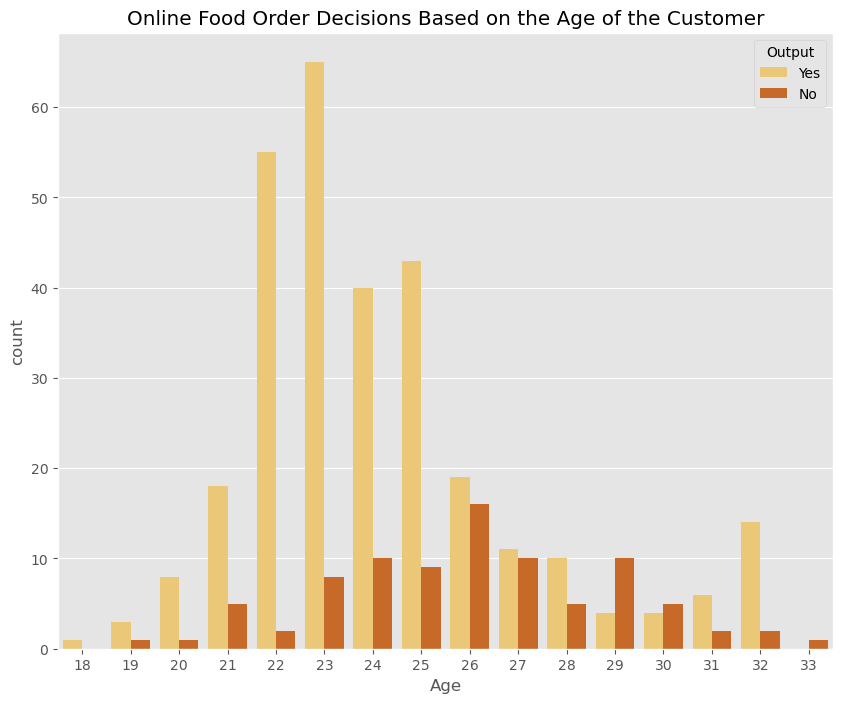

In [9]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.countplot(x='Age',data=data,hue='Output',palette="YlOrBr")

<Axes: title={'center': 'Online Food Order Decisions Based on the Size of the Family'}, xlabel='Family size', ylabel='count'>

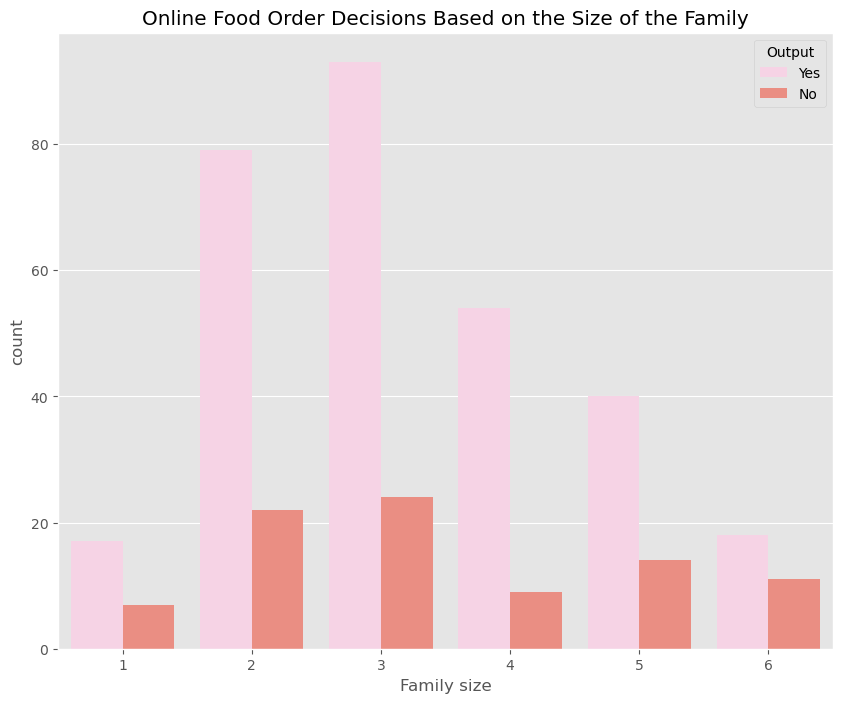

In [10]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.countplot(x='Family size',data=data,hue='Output',palette="Set3_r")

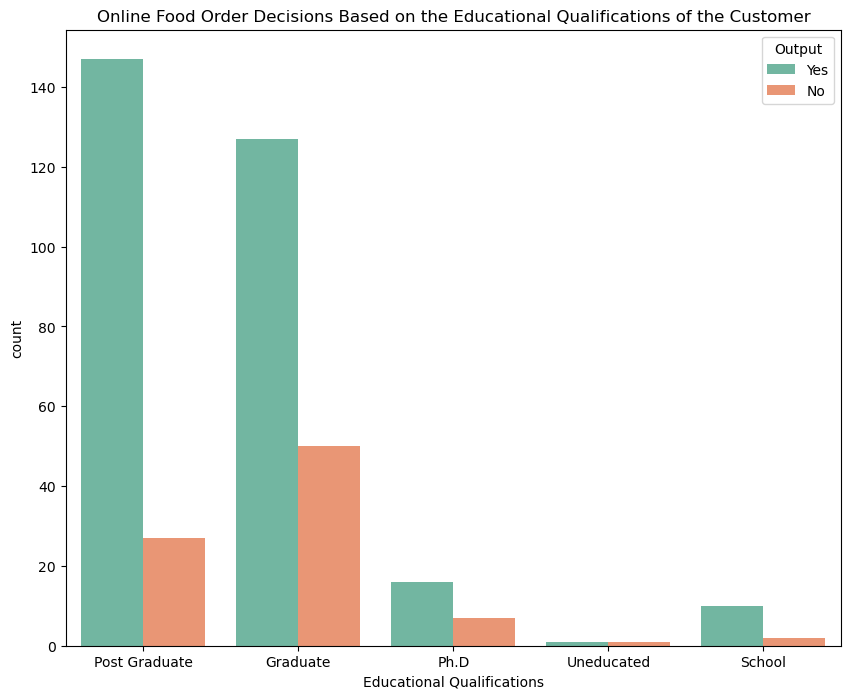

In [11]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Educational Qualifications of the Customer")
sns.countplot(x='Educational Qualifications',data=data,hue='Output',palette="Set2");

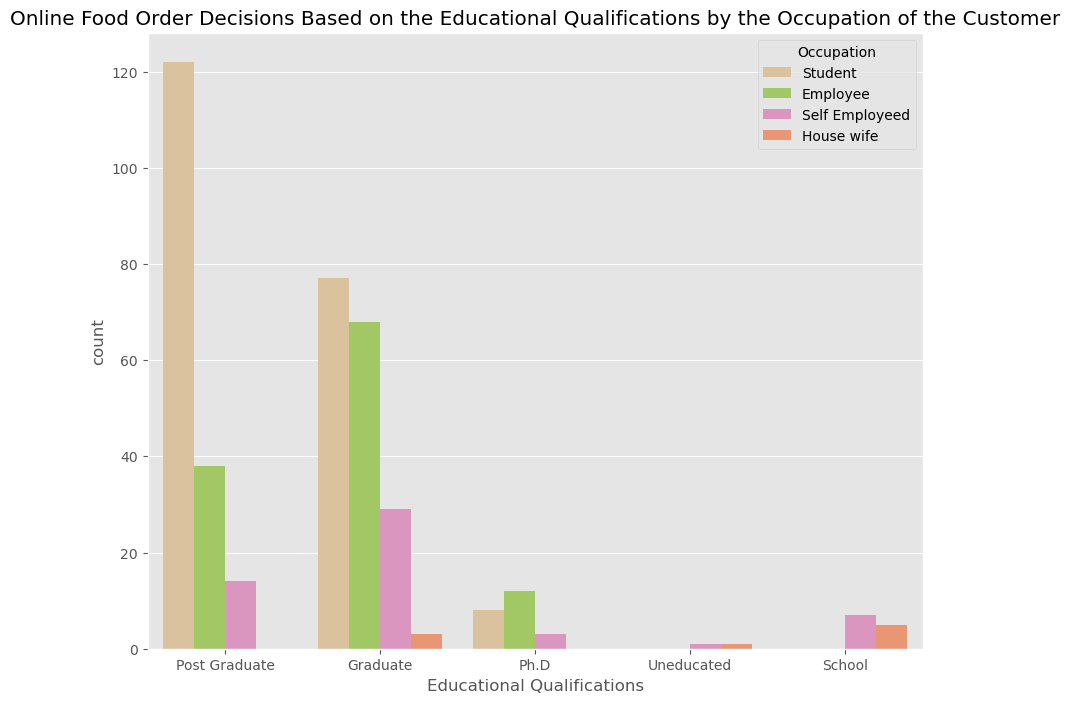

In [11]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Educational Qualifications by the Occupation of the Customer")
sns.countplot(x='Educational Qualifications',data=data,hue='Occupation',palette="Set2_r");


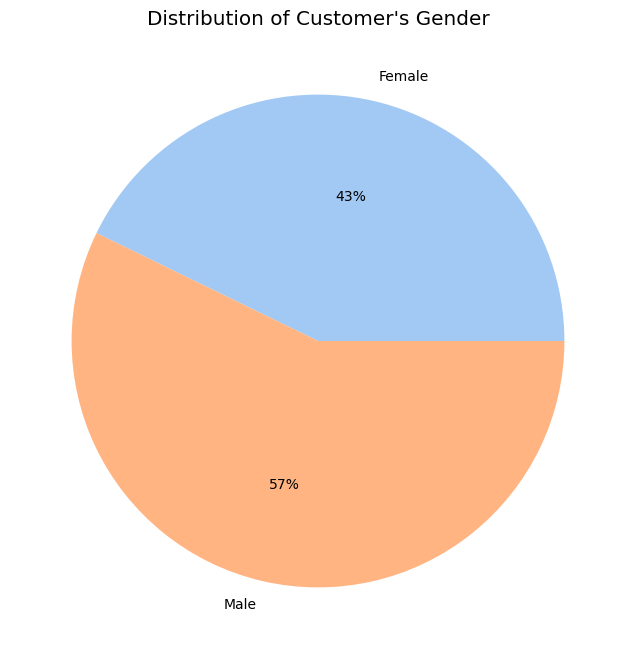

In [12]:
female = len(data[data["Gender"] == 'Female'])
male = len(data[data["Gender"] == 'Male'])
data_gender = [female,male]
labels = ['Female', 'Male']

colors = sns.color_palette('pastel')[0:5] # seaborn color palette to use

plt.figure(figsize=(10,8))
plt.title("Distribution of Customer's Gender")
plt.pie(data_gender, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

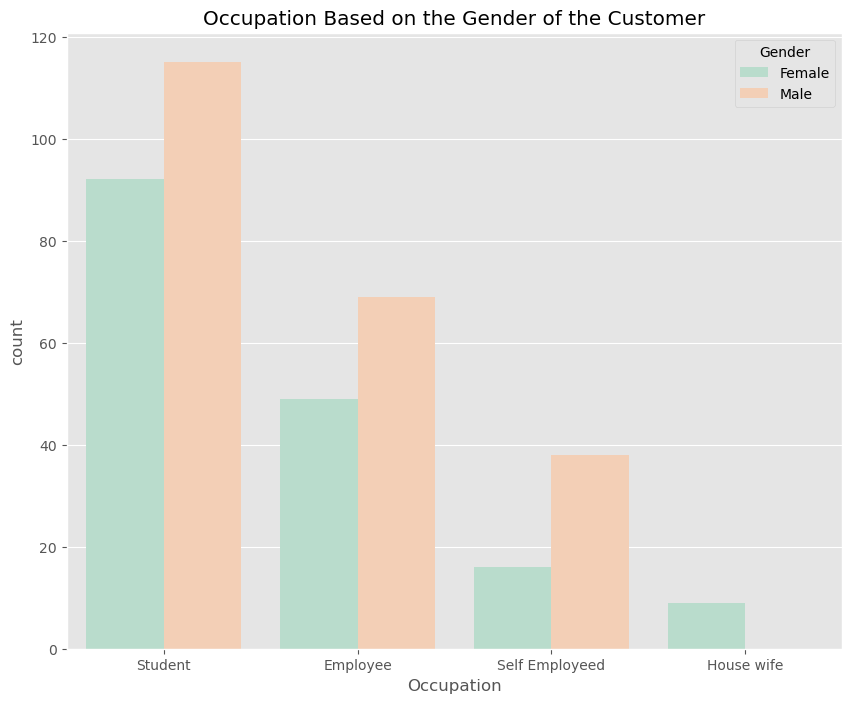

In [13]:
plt.figure(figsize=(10,8))
plt.title("Occupation Based on the Gender of the Customer")
sns.countplot(x='Occupation',data=data,hue='Gender',palette="Pastel2");


In [19]:
reorder = data[data["Output"] == "Yes"]
gender_data = reorder['Gender'].value_counts()
label = gender_data.index
counts = gender_data.values

colors = sns.color_palette('pastel')[2:4]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text = "Which Gender is More Likely to Order Online Again?")
fig.update_traces(hoverinfo="label+percent", textinfo="value",marker=dict(colors=colors))

fig.show()

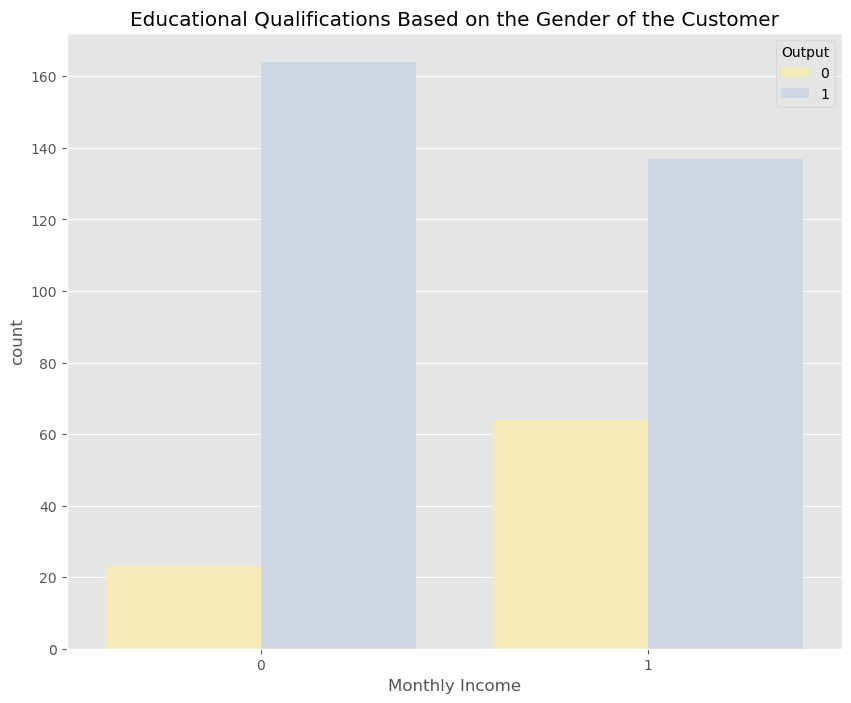

In [20]:
plt.figure(figsize=(10,8))
plt.title("Educational Qualifications Based on the Gender of the Customer")
sns.countplot(x='Monthly Income',data=data,hue='Output',palette="Pastel2_r");

In [21]:
reorder = data[data["Output"] == "Yes"]
status_data = reorder['Marital Status'].value_counts()
label = status_data.index
counts = status_data.values

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text = "What is the Marital Status of Customers?")
fig.update_traces(hoverinfo="label+percent", textinfo="value",marker=dict(colors=colors))

fig.show()

In [22]:
data["Monthly Income"].unique()

array([0, 1])

In [24]:
data["Gender"] = data["Gender"].map({"Male":0,"Female":1}) # male or female

data["Marital Status"] = data["Marital Status"].map({"Married":0,"Single":1,"Prefer not to say":2})


data["Occupation"] = data["Occupation"].replace(to_replace=["Employee","Self Employeed"], value=1) # employed
data["Occupation"] = data["Occupation"].replace(to_replace=["Student","House wife"], value=0) # unemployed


data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4,
                                                                             "Uneducated": 5})


data["Monthly Income"] = data["Monthly Income"].replace(to_replace=["No Income"], value=0) # no income
data["Monthly Income"] = data["Monthly Income"].replace(to_replace=["Below Rs.10000",
                                                                   "More than 50000",
                                                                   "25001 to 50000",
                                                                   "10001 to 25000"], value=1)  # has an income
                                                                             
#data["Feedback"] = data["Feedback"].map({"Negative ":0,"Positive":1}) # negative or positive

data["Output"] = data["Output"].map({"No":0,"Yes":1}) # no or yes

NameError: name 'data' is not defined

AttributeError: module 'seaborn.utils' has no attribute 'hex_color'

<Axes: title={'center': 'Monthly Income Based on the count'}, xlabel='Monthly Income', ylabel='count'>

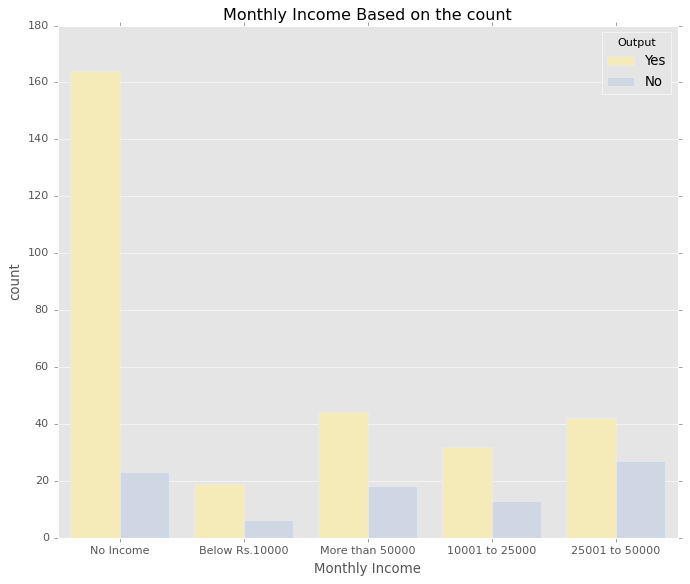

NameError: name 'data' is not defined

# Here we are preparing the data

In [15]:
data["Monthly Income"].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [27]:
data["Gender"] = data["Gender"].map({"Male":0,"Female":1}) # male or female

data["Marital Status"] = data["Marital Status"].map({"Married":0,"Single":1,"Prefer not to say":2})


data["Occupation"] = data["Occupation"].replace(to_replace=["Employee","Self Employeed"], value=1) # employed
data["Occupation"] = data["Occupation"].replace(to_replace=["Student","House wife"], value=0) # unemployed


data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4,
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].replace(to_replace=["No Income"], value=0) # no income
data["Monthly Income"] = data["Monthly Income"].replace(to_replace=["Below Rs.10000",
                                                                   "More than 50000",
                                                                   "25001 to 50000",
                                                                   "10001 to 25000"], value=1)  # has an income
                                                                             
#data["Feedback"] = data["Feedback"].map({"Negative ":0,"Positive":1}) # negative or positive

data["Output"] = data["Output"].map({"No":0,"Yes":1}) # no or yes


# prediction Model

In [25]:
X = data.drop('Output',axis=1)
y = data['Output']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=101)

print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)


Shape of train dataset :  (310, 10)
Shape of test dataset :  (78, 10)


In [18]:
r = random.randint(0,len(data))
print(r)
new_customer = data.drop('Output', axis=1).iloc[r]
new_customer

263


Age                               23.0000
Gender                             1.0000
Marital Status                     2.0000
Occupation                         1.0000
Monthly Income                     1.0000
Educational Qualifications         1.0000
Family size                        3.0000
latitude                          12.9889
longitude                         77.5741
Pin code                      560020.0000
Name: 263, dtype: float64

In [28]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

print(rfc.score(X_test, y_test))

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [29]:
pred = rfc.predict(X_test)

print(confusion_matrix(pred,y_test))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(pred,y_test), annot=True);

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [21]:
pred = rfc.predict(X_test)

print(confusion_matrix(pred,y_test))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(pred,y_test), annot=True);

NameError: name 'X_test' is not defined